In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, accuracy_score

In [39]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.23269388, 0.23269227, 0.23269276, ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.00000000e+00, 9.99991010e-01, 9.99991010e-01, ...,
       1.79807606e-05, 8.99038029e-06, 0.00000000e+00]), 'Thresholds': array([3.4206318e-09, 3.4206902e-09, 3.4220413e-09, ..., 9.9296737e-01,
       9.9338406e-01, 9.9372345e-01], dtype=float32)}


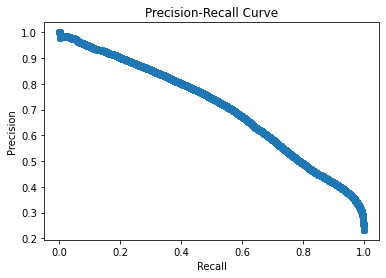

In [40]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

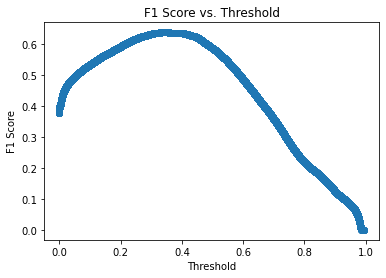

In [41]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

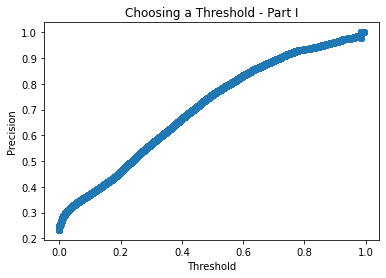

In [42]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

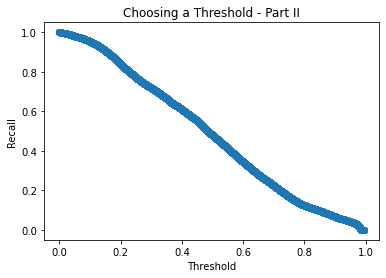

In [43]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [44]:
curve['Thresholds'][np.argmax(f1_scores)]

0.34527215

In [45]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[3.2262462e-01 6.2435490e-01 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09 1.8399607e-09
 1.839

In [46]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[1. 0.]


In [47]:
types = np.load("Types.npy", allow_pickle = True)
print(types[0])

[b'ege' b'\xabd\xe3?']


In [48]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])

print(filt_pred[0], filt_act[0])

[0.32262462] [1.]


In [49]:
filt_type = []

for i in range(len(predicted)):
    mask = compton[i].astype(int).astype(bool)
    filt_type.append(types[i][mask])

print(filt_type[0])

[b'ege']


In [50]:
print(set([len(typ) for typ in filt_type]))

{0, 1, 2}


In [51]:
#new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
#                                                                     np.hstack(np.array(filt_pred)))

In [52]:
#plt.figure()
#plt.scatter(new_thresholds, new_recalls[:-1])
#plt.title('Recall of Intial Tracks')
#plt.xlabel('Threshold')
#plt.ylabel('Recall');

In [53]:
unpad_pred = []
unpad_act = []
mean_acc = 0

for i in range(len(predicted)):
    orig_pred = predicted[i][:len(compton[i])]
    orig_act = actual[i][:len(compton[i])]
    unpad_pred.append(orig_pred)
    unpad_act.append(orig_act)
    mean_acc += accuracy_score(orig_pred >= 0.5, orig_act)

print(mean_acc / len(predicted))

0.8051285294268351


In [54]:
compare_pred = [1.0 * (unpad >= 0.4) for unpad in unpad_pred]
print(compare_pred[0], unpad_act[0])

[0. 1.] [1. 0.]


In [63]:
lengths = [len(pair[0]) for pair in zip(compare_pred, unpad_act)]
accuracies = [accuracy_score(*pair) for pair in zip(compare_pred, unpad_act)]
print(np.mean(accuracies))

0.797471971368865


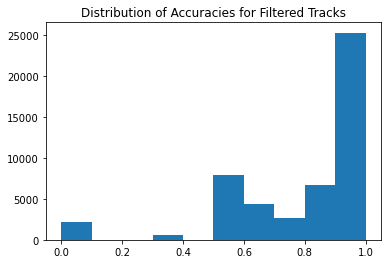

In [56]:
plt.hist(accuracies)
plt.title('Distribution of Accuracies for Filtered Tracks');

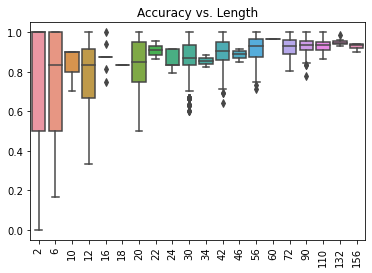

In [69]:
sns.boxplot(x = lengths, y = accuracies)
plt.title('Accuracy vs. Length')
plt.xticks(rotation = 90);

In [57]:
#filt_pred_new = [1.0 * (filt >= 0.4) for filt in filt_pred]
#print(filt_pred_new[0], filt_act[0])

In [58]:
#filt_act = [filt for filt in filt_act if len(filt) > 0]
#filt_pred_new = [filt for filt in filt_pred_new if len(filt) > 0]
#filt_accs = [accuracy_score(*pair) for pair in zip(filt_pred_new, filt_act)]
#print(np.mean(filt_accs))

In [59]:
#plt.hist(filt_accs)
#plt.title('Distribution of Accuracies for Initial Tracks');

In [60]:
#elec_acc_list = [filt_p[0] == filt_a[0] for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]
#elec_acc = sum(elec_acc_list) / len(elec_acc_list)
#print(elec_acc)

#gamma_acc_list = [filt_p[1] == filt_a[1] if len(filt_p) >= 2 else False for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]
#gamma_acc = sum(gamma_acc_list) / len(gamma_acc_list)
#print(gamma_acc)

In [61]:
def calc_rates(predicted, actual):
    
    TP = FP = TN = FN = 0

    for i in range(len(predicted)): 
        pred, act = predicted[i], actual[i]
        
        for j in range(len(pred)):
            if act[j] == pred[j] == 1:
                TP += 1
            if pred[j] == 1 and act[j] != pred[j]:
                FP += 1
            if act[j] == pred[j] == 0:
                TN += 1
            if pred[j] == 0 and act[j] != pred[j]:
                FN += 1
    
    return TP / (TP + FN), FN / (TP + FN)

In [62]:
calc_rates(compare_pred, unpad_act)

(0.6102580239144115, 0.3897419760855884)